<a href="https://colab.research.google.com/github/leekangwoo/AIB-18-discussion/blob/main/n112a_EDA(2)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 2*

---

# 📝 Assignment

# **🌱 기본 과제**

## **Part 1. EDA**

### **1-1. 데이터 불러오기**

아래의 Tip을 활용하여 Seaborn 라이브러리에 내장되어 있는 Titanic 데이터셋을 불러옵니다.

> **💡 Tip**
> - import seaborn as sns
> - df = sns.[load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)("titanic")

In [ ]:
import seaborn as sns
df = sns.load_dataset("titanic")

### **1-2. 데이터 분석**

##### **Q1. 생존자와 사망자 중 평균 나이가 더 높은 그룹을 쓰세요.**

- `Survived` column의 1은 생존자, 0은 사망자를 의미합니다.
- **`.groupby()`**를 사용하여 생존 여부별 평균 나이를 구하세요.

In [ ]:
df.groupby('survived', as_index=False)['age'].mean()

,survived,age
0,0,30.626179
1,1,28.343690


##### **Q2. 사망자 중 남자의 좌석 등급의 중앙값을 쓰세요.**

- **`.groupby()`**와 [`.median()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html)을 사용하여 생존 여부와 성별에 따른 좌석 등급의 중앙값을 구하세요. 
  - 결과는 데이터프레임 형태로 나타내세요. 

In [ ]:
# df[['sex', 'survived', 'pclass']]
death_male = df.query('survived == 0')

death_male.groupby('sex', as_index=False)['pclass'].median()

,sex,pclass
0,female,3.0
1,male,3.0


##### **Q3. `young` 그룹의 사망자의 비율을 반올림하여 소숫점 둘째 자리까지 쓰세요.**

- **`.query()`**를 사용하여 `age` 컬럼의 데이터를 다음 세 그룹으로 나누어 차례대로 변수 `young`, `middle`, `old`에 저장합니다.
  - `young`: 20세 미만 
  - `middle`: 20세 이상 60세 미만
  - `old`: 60세 이상 

- **`.value_counts()`**의 `normalize` 파라미터를 설정하여 각 그룹별 `survived` 데이터 비율을 구하세요. 

In [ ]:
df = sns.load_dataset("titanic")
# df_all = df.query("age > 0")
df_young = df.query("age < 20")
# df_middle = df.query("(age >= 20) and (age < 60)")
# df_old = df.query("age >= 60")

# print(df_all.shape[0])
# print(df_young.shape[0] + df_middle.shape[0] + df_old.shape[0])

data = df_young['survived'].value_counts(normalize = True)
print(f'{data[0]:.2f}')

0.52


### **1-3. 데이터 시각화**

##### **Q4. bar 높이가 가장 높은 대상을 쓰세요.**

- 생존 여부와 성별에 따른 평균 요금을 bar plot으로 나타냅니다. 

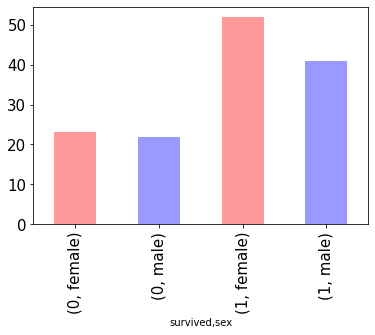

In [ ]:
df_data = df.groupby(['survived', 'sex']).mean()['fare']
df_data.plot(kind='bar', color=['red','blue'], title='', fontsize=15, alpha=0.4);

# **🥇 도전과제**



## **Part 2. 시각화**

### **2-1. Categorical Variable의 시각화**

##### **`survived`의 비율을 확인하세요.**

- Matplotlib의 [`.pie`](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)를 사용하여 `survived` 컬럼의 비율을 시각화해 봅니다.


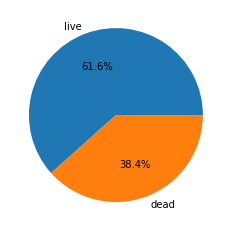

In [ ]:
import matplotlib.pyplot as plt

df_surv_all = df.query("survived")
df_surv_0 = df.query("survived == 0")
df_surv_1 = df.query("survived == 1")
# print(df_surv_all.shape[0], df_surv_0.shape[0] + df_surv_1.shape[0])

ratio = [df_surv_0.shape[0], df_surv_1.shape[0]]
labels = ['live', 'dead']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

##### **pclass의 도수를 확인하세요.**

- Seaborn의 [`.countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html)을 사용하여 `pclass` 컬럼의 도수를 시각해 봅니다. 

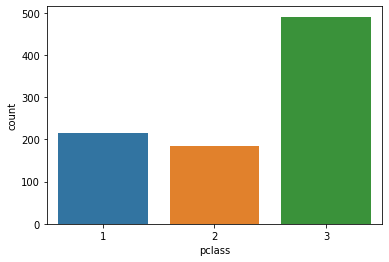

In [ ]:
# df
sns.countplot(x="pclass", data=df)
plt.show()

### **2-2. Continuous variables의 시각화**

##### **Age column을 histogram으로 나타내세요.**

- Age column을 histogram으로 나타낼 때, np.arange(0, df.Age.max()+bin_size, bin_size) 에서 bin의 개수가 8이 되도록 bin_size 값을 설정하여 시각화해 보세요.

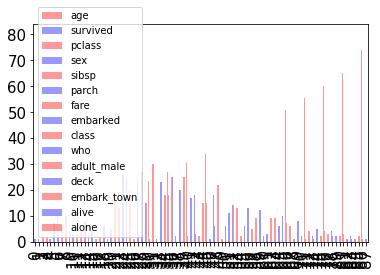

In [ ]:
import numpy as np
import pandas as pd


df

df.groupby('age', as_index=False).count()
df_data = df.count()['age']
df_data
df_young = df.query("age < 20")
# print(df_young.shape[0])
bin_size = 8

# df.age.max()
df_data = df.groupby('age', as_index=False).count()

bins = np.arange(0, df.age.max()+bin_size, 10)
# bins = np.arange(10, df.age.max(), 10)
labels = [10, 20, 30, 40, 50, 60, 70, 80]
# print(bins)
# print(df_data)
# df_data['levels'] = pd.cut(x=df_data['age'], bins=bins, labels=labels)
df_data['levels'] = pd.cut(x=df_data['age'], bins=bins, labels=labels)
df_data.plot(kind='bar', color=['red','blue'], title='', fontsize=15, alpha=0.4);
plt.show()